BASIC PYTHON CODES THAT WILL BE USED IN IMAGE PROCESSING

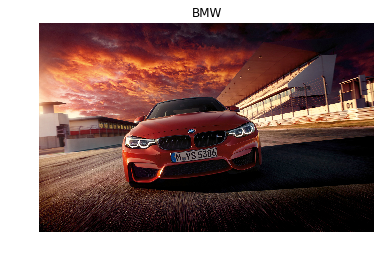

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

img=plt.imread('Images/3.jpg') #reads the image
plt.axis('off') #does not include the axis
plt.title('BMW') #title to show on the top
plt.imshow(img) #to show the image


In [3]:
print(type(img)) #type of the image

<class 'numpy.ndarray'>


IMAGE PROPERTIES

In [8]:
print(img.shape)
print(img.ndim)
print(img.size)
print(img.dtype)
print(img.nbytes)

(1600, 2560, 3)
3
12288000
uint8
12288000


NUMBER PLATE DETECTION

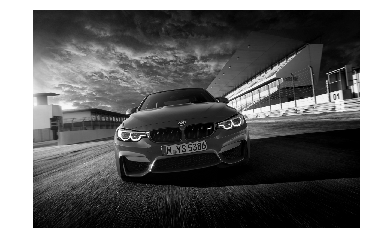

In [5]:
import skimage.io
import cv2
import numpy as np
import argparse
from copy import deepcopy
from PIL import Image
from matplotlib import pyplot as plt


img=cv2.imread('Images/3.jpg',cv2.IMREAD_COLOR) #reading image
img3=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #BGR to RGB conversion as open cv stores as BGR format
img3=cv2.resize(img3,(1200,800)) 
gray=cv2.cvtColor(img3,cv2.COLOR_RGB2GRAY)

plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.savefig('gray.jpg',dpi=300) #saving the grayscale image 

In [6]:
image=cv2.imread('gray.jpg')#reading grayscale image

noisefree=cv2.bilateralFilter(gray,9,75,75)#filtering image

kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

morph=cv2.morphologyEx(noisefree,cv2.MORPH_OPEN,kernel,iterations=15) #morphological opening with rectangular structure element

sub=cv2.subtract(noisefree,morph) #image subtraction

ret,threshold=cv2.threshold(sub,0,255,cv2.THRESH_OTSU) #image thresholding

edged=cv2.Canny(threshold,50,250)
edged=cv2.resize(edged,(1200,800))
canny=cv2.convertScaleAbs(edged) #dilation to strengthen the edges
cv2.imshow('edges',edged); cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)


-1

-1

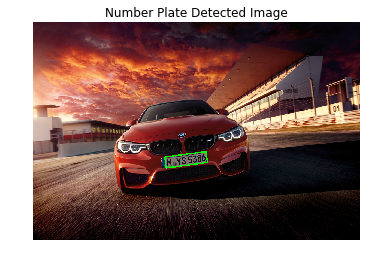

In [9]:

kernel=np.ones((3,3),np.uint8) #creating kernel for dilation
dil=cv2.dilate(canny,kernel,iterations=1)

contours,hierarchy=cv2.findContours(dil.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #finding contours
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]
screenCnt=None

#loop to find Number Plate Contour
idx=0
for c in contours:
    idx+=1
    
    peri=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.06*peri,True)
    if len(approx)==4:  #selects contour with 4 corners
        screenCnt=approx
        #drawing a rectangle on the number plate ->>
        (x,y,w,h)=cv2.boundingRect(c)
        roi=img3[y:y+h,x:x+w] #image extraction
        cv2.imwrite(str(idx)+'.jpg',roi) #saves the extracted number plate in the form of jpg image
        #cv2.rectangle(img3,(x,y),(x+w,y+h),(0,255,0),2)
        rect=cv2.minAreaRect(c)
        box=cv2.boxPoints(rect)
        box=np.int0(box) #float to int
        break
        

final=cv2.drawContours(img3,[box],-1,(0,255,0),3) #drawing contours with the original image        
#masking not required as I have saved the masked image, for masking the code is below ->
#mask=np.zeros(image.shape,np.uint8)
#new=cv2.drawContours(mask,[box],0,255,-1,)
#new=cv2.bitwise_and(image,image,mask=mask)

cv2.imshow('Final image',final)
plt.imshow(final)
plt.title('Number Plate Detected Image')
plt.axis('off')
cv2.waitKey(0)